In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv("/content/train_data.csv")
test = pd.read_csv("/content/test_data.csv")

In [4]:
train.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,3,8450,1,3,3,0,4,...,0,0,0,0,0,2,2008,8,4,12.247694
1,1,2,20,3,9600,1,3,3,0,2,...,0,0,0,0,0,5,2007,8,4,12.109011
2,2,3,60,3,11250,1,0,3,0,4,...,0,0,0,0,0,9,2008,8,4,12.317167
3,3,4,70,3,9550,1,0,3,0,0,...,272,0,0,0,0,2,2006,8,0,11.849398
4,4,5,60,3,14260,1,0,3,0,2,...,0,0,0,0,0,12,2008,8,4,12.429216


In [8]:
train = train.drop(["Unnamed:0", "Id"], axis=1, errors='ignore')
test = test.drop(["Unnamed:0", "Id"], axis=1, errors='ignore')

In [11]:
train_data = train.values
y = train_data[:, -1].reshape(train_data.shape[0],1)
x = train_data[:, :-1]

In [12]:
test_data  = test.values
y_test = test_data[:, -1].reshape(test_data.shape[0],1)
x_test = test_data[:, :-1]

In [13]:
print(x.shape)
print(y.shape)
print(x_test.shape)
print(y_test.shape)

(1200, 70)
(1200, 1)
(258, 70)
(258, 1)


In [14]:
x = np.vstack((np.ones((x.shape[0],)),x.T)).T
x_test = np.vstack((np.ones((x_test.shape[0],)),x_test.T)).T


In [18]:
print(x)
print(".............................................")
print(x_test)

[[1.000e+00 0.000e+00 6.000e+01 ... 2.008e+03 8.000e+00 4.000e+00]
 [1.000e+00 1.000e+00 2.000e+01 ... 2.007e+03 8.000e+00 4.000e+00]
 [1.000e+00 2.000e+00 6.000e+01 ... 2.008e+03 8.000e+00 4.000e+00]
 ...
 [1.000e+00 1.197e+03 2.000e+01 ... 2.009e+03 8.000e+00 4.000e+00]
 [1.000e+00 1.198e+03 2.000e+01 ... 2.006e+03 8.000e+00 4.000e+00]
 [1.000e+00 1.199e+03 2.000e+01 ... 2.006e+03 7.000e+00 0.000e+00]]
.............................................
[[1.000e+00 1.200e+03 6.000e+01 ... 2.009e+03 8.000e+00 4.000e+00]
 [1.000e+00 1.201e+03 5.000e+01 ... 2.009e+03 8.000e+00 4.000e+00]
 [1.000e+00 1.202e+03 2.000e+01 ... 2.009e+03 8.000e+00 4.000e+00]
 ...
 [1.000e+00 1.455e+03 7.000e+01 ... 2.010e+03 8.000e+00 4.000e+00]
 [1.000e+00 1.456e+03 2.000e+01 ... 2.010e+03 8.000e+00 4.000e+00]
 [1.000e+00 1.457e+03 2.000e+01 ... 2.008e+03 8.000e+00 4.000e+00]]


In [44]:
def model(x, y, learning_rate, itereation):
  n= y.size
  beta = np.zeros((x.shape[1],1))
  cost_list=[]

  for i in range(itereation):

    y_pred = np.dot(x, beta)

    cost = (1/(2*n))*np.sum(np.square(y_pred - y))

    d_beta = (1/n)*np.dot(x.T, (y_pred - y))
    beta = beta - learning_rate*d_beta

    cost_list.append(cost)

    if (i%(itereation/10) == 0):
      print("cost is :- ", cost)

  return beta, cost_list

In [45]:
iteration =100000
learning_rate = 0.0000000005
beta, cost_list = model(x, y, learning_rate,itereation = iteration)

cost is :-  72.37539364066856
cost is :-  0.033712459820814715
cost is :-  0.019585478434994304
cost is :-  0.017102700533299084
cost is :-  0.016368039517525183
cost is :-  0.01608211662676751
cost is :-  0.01593965113106951
cost is :-  0.015849578582456347
cost is :-  0.015782030214325483
cost is :-  0.015726345436930595


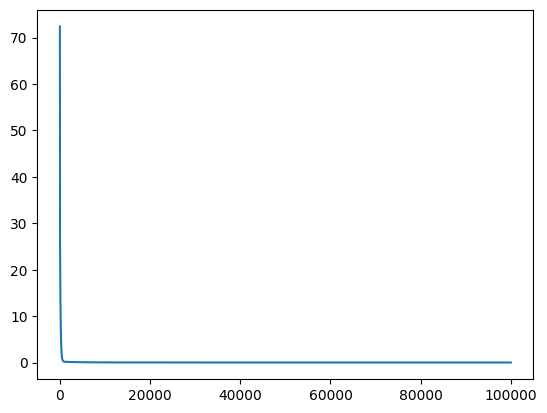

In [46]:
dig = np.arange(0, iteration)
plt.plot(dig, cost_list)
plt.show()

In [47]:
y_pred = np.dot(x_test, beta)
error = (1/x_test.shape[0])*np.sum(np.abs(y_pred - y_test))
print("error is :- ", error)

error is :-  0.12935242020352744


In [48]:
print(1-error)

0.8706475797964726
